In [1]:
import numpy as np
import pandas as pd
from ipywidgets import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [12]:
endFile = '000000000000neutronend.out'
df_end = pd.read_csv(endFile, sep=' ')
# df_end.head()
# df_end.columns

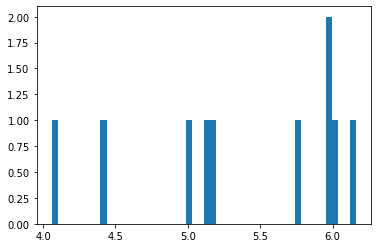

In [3]:
df_end['vmag'] = (df_end['vxstart']**2+df_end['vystart']**2+df_end['vzstart']**2)**.5

fig, ax = plt.subplots()
ax.hist(df_end['vmag'],bins=50)
plt.show()



In [4]:
spinFile = '000000000000neutronspin.out'
df_spin = pd.read_csv(spinFile, sep=' ')
# df_spin.head()
# df_spin.columns

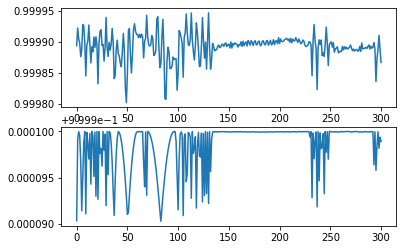

In [16]:
df_spin_1 = df_spin[df_spin.particle==1]

fig, ax = plt.subplots(2)
ax[0].plot(df_spin_1['t'],-df_spin_1['Sz'])
ax[0].ticklabel_format(style='sci',useOffset=False)
ax[1].plot(df_spin_1['t'],df_spin_1['Bz']/(df_spin_1['Bx']**2+df_spin_1['By']**2+df_spin_1['Bz']**2)**.5)


In [6]:
snapFile = '000000000000neutronsnapshot.out'
df_snap = pd.read_csv(snapFile, sep=' ')
# df_snap.columns
# df_snap.head()

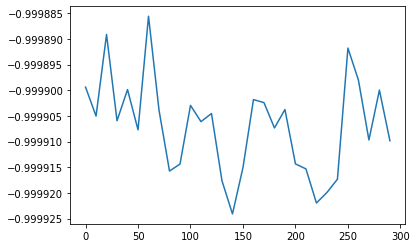

In [7]:
snapTimes = df_snap['tend'].unique()
snapPol = np.array([df_snap[df_snap['tend'] == tUni]['Szend'].mean() for tUni in snapTimes])

fig, ax = plt.subplots()
ax.plot(snapTimes,snapPol)
ax.ticklabel_format(style='sci',useOffset=False)
plt.show()


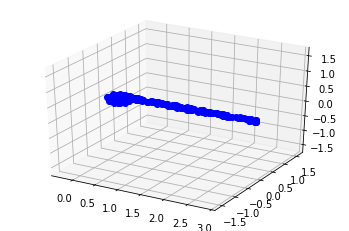

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(df_snap['xend'],df_snap['yend'],df_snap['zend'],'bo')
ax.set_xlim3d(-.4, 3)
ax.set_ylim3d(-1.7,1.7)
ax.set_zlim3d(-1.7,1.7)
plt.show()